In this lecture, we will learn some vary basic concepts of model building.

- [A simple model](#A-simple-model)
- [Visualizing models](#Visualizing-models)

# A simple model

In [1]:
library(tidyverse)

library(modelr) # wrapper around base R modeling functions so that they work with the pipe
options(na.action = na.warn) # so that missing values are not silently dropped by modeling functions

── Attaching packages ─────────────────────────────────────── tidyverse 1.3.0 ──

✔ ggplot2 3.3.0     ✔ purrr   0.3.3
✔ tibble  2.1.3     ✔ dplyr   0.8.5
✔ tidyr   1.0.2     ✔ stringr 1.4.0
✔ readr   1.3.1     ✔ forcats 0.5.0

── Conflicts ────────────────────────────────────────── tidyverse_conflicts() ──
✖ dplyr::filter() masks stats::filter()
✖ dplyr::lag()    masks stats::lag()



We will use a toy simulated data set `sim1`

In [2]:
head(sim1)

x,y
<int>,<dbl>
1,4.199913
1,7.510634
1,2.125473
2,8.988857
2,10.243105
2,11.296823


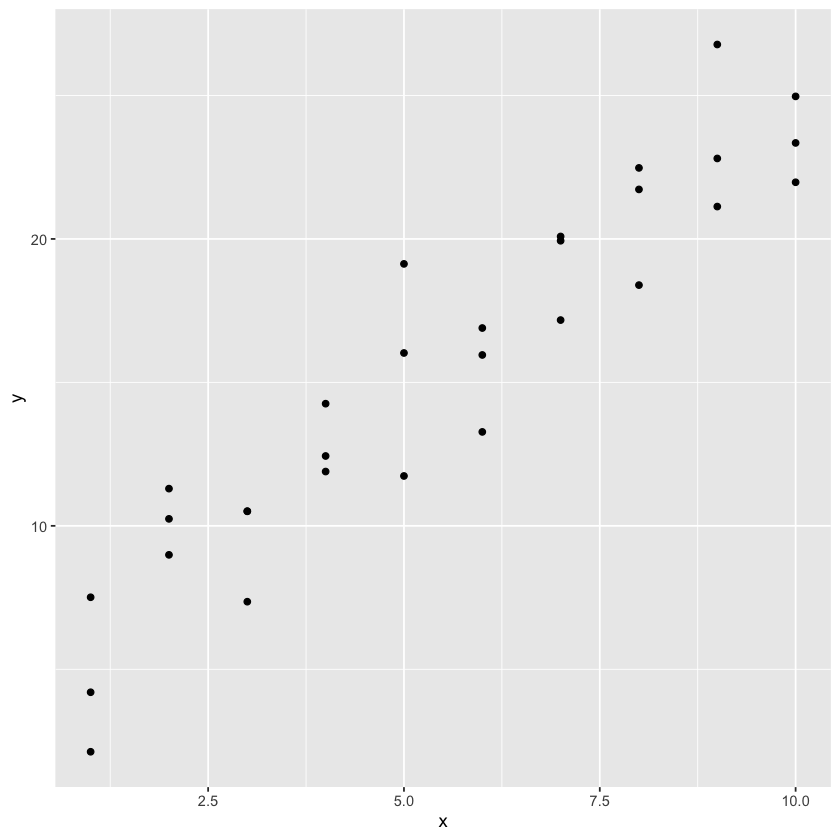

In [3]:
ggplot(sim1) +
    geom_point(aes(x, y))

In [4]:
(a0 = runif(1, 1, 10))

[1] 9.605662

In [5]:
(a1 = runif(1, -5, 5))

[1] -4.678069

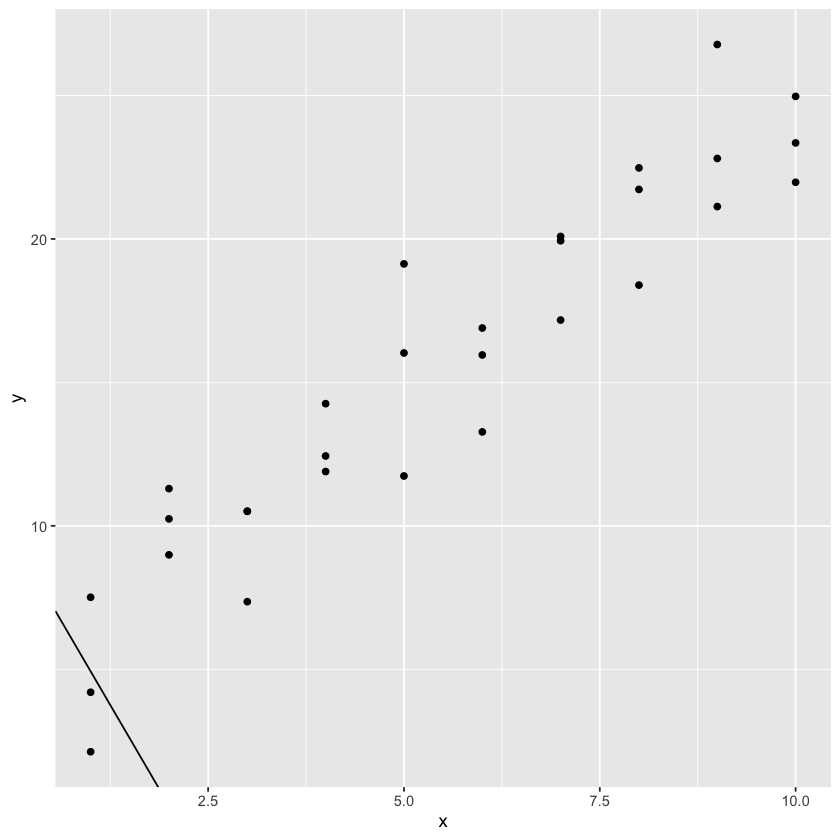

In [6]:
ggplot(sim1) +
    geom_point(aes(x, y)) +
    geom_abline(intercept=a0, slope=a1) # plots the line y = a0 + a1 * x

We are using a model of the form y = a0 + a1 * x. We have picked a random model from this family. Is it a good model for the data?

Let's try more models. In fact let's try 200 of them!

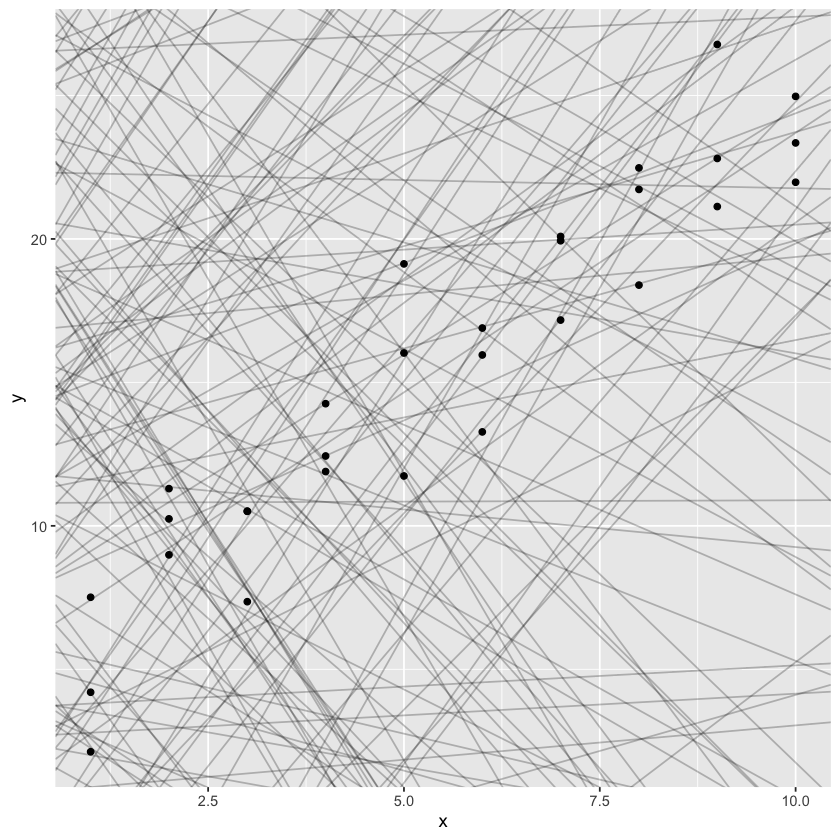

In [8]:
models <- tibble(
  a1 = runif(200, -20, 40),
  a2 = runif(200, -5, 5)
)

ggplot(sim1, aes(x, y)) + 
  geom_abline(aes(intercept = a1, slope = a2), data = models, alpha = 1/4) +
  geom_point() 

In [15]:
model_predictions <- function(model, data) {
    model[1] + data$x * model[2]
}

In [39]:
model_predictions(c(4, 3), sim1)

[1]  7  7  7 10 10 10 13 13 13 16 16 16 19 19 19 22 22 22 25 25 25 28 28 28 31
[26] 31 31 34 34 34

In [40]:
sim1$y

[1]  4.199913  7.510634  2.125473  8.988857 10.243105 11.296823  7.356365
 [8] 10.505349 10.511601 12.434589 11.892601 14.257964 19.130050 11.738021
[15] 16.024854 13.273977 15.955975 16.894796 20.085993 17.171850 19.936309
[22] 21.725903 18.390913 22.475553 26.777010 22.805110 21.128305 24.968099
[29] 23.346422 21.975201

In [41]:
measure_distance <- function(model, data) {
    predictions <- model_predictions(model, data)
    diff <- data$y - predictions
    sqrt(mean(diff ^ 2))
}

In [54]:
intercept = 4
slope = 3
measure_distance(c(intercept, slope), sim1)

[1] 6.075216

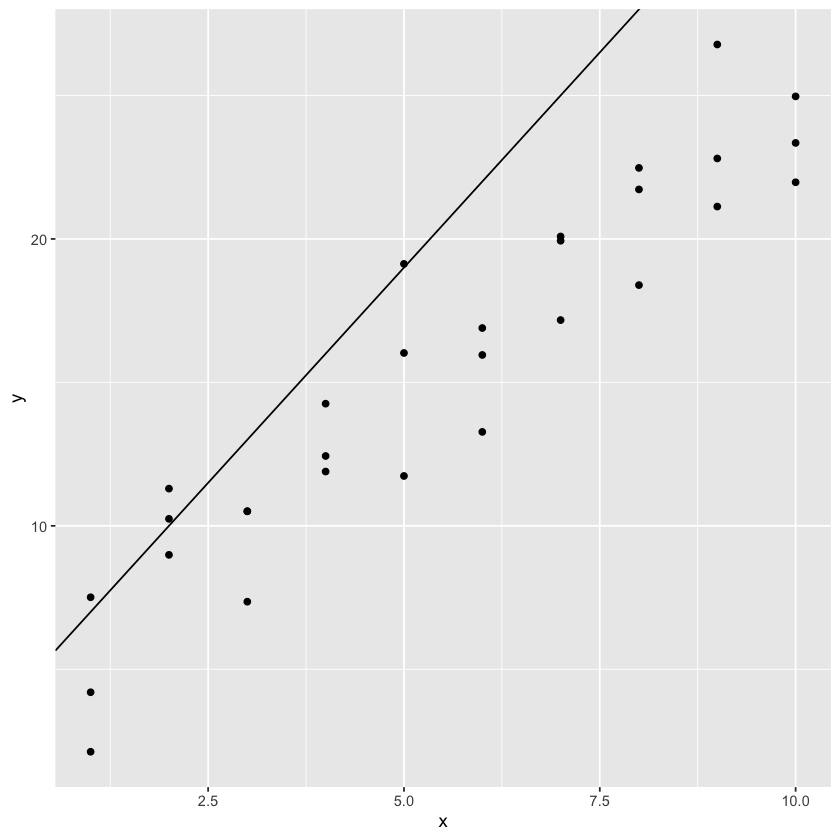

In [55]:
ggplot(sim1) +
    geom_point(aes(x, y)) +
    geom_abline(intercept=intercept, slope=slope)

In [73]:
sim1_dist <- function(a1, a2) {
  measure_distance(c(a1, a2), sim1)
}

models <- models %>% 
  mutate(dist = map2_dbl(a1, a2, sim1_dist))
top_n(models, 5, -dist) # top 5 models (models with least dist values)

a1,a2,dist
<dbl>,<dbl>,<dbl>
7.5074829,1.233277,3.395004
7.4320445,2.068308,3.929949
7.4015739,1.713264,2.686315
5.6112659,1.808628,2.240289
0.7795881,1.979202,4.394390


Let's look at the 5 best models

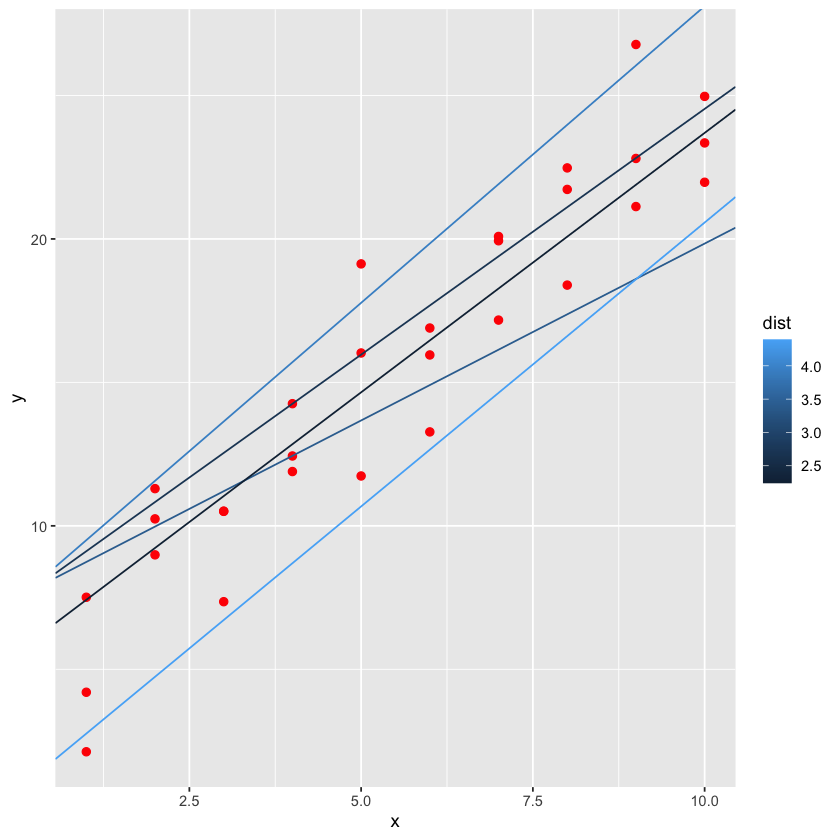

In [74]:
ggplot(sim1, aes(x, y)) + 
  geom_point(size = 2, color = "red") + 
  geom_abline(
    aes(intercept = a1, slope = a2, color = dist), 
    data = top_n(models, 5, -dist)
  )

# Visualizing models